In [1]:
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt

In [14]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS
from neuralforecast.losses.pytorch import MQLoss, DistributionLoss
from neuralforecast.tsdataset import TimeSeriesDataset
from neuralforecast.utils import AirPassengers, AirPassengersPanel, AirPassengersStatic, AirPassengersDF

In [20]:
Y_train_df = AirPassengersDF[AirPassengersPanel.ds<AirPassengersPanel['ds'].values[-12]] # 132 train
Y_test_df = AirPassengersDF[AirPassengersPanel.ds>=AirPassengersPanel['ds'].values[-12]].reset_index(drop=True) # 12 test

In [21]:
model = NBEATS(h=12, input_size=24,
               loss=DistributionLoss(distribution='Poisson', level=[80, 90]),
               stack_types = ['identity', 'trend', 'seasonality'],
               max_steps=100,
               val_check_steps=10,
               early_stop_patience_steps=2,
               activation = 'ReLU')

fcst = NeuralForecast(
    models=[model],
    freq='M'
)
fcst.fit(df=Y_train_df, static_df=AirPassengersStatic, val_size=12)
forecasts = fcst.predict(futr_df=Y_test_df)

Global seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 65.47it/s]


In [26]:
forecasts

,ds,NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
unique_id,,,,,,,
1.0,1960-01-31,429.102997,429.0,396.000000,404.000000,455.000000,460.049988
1.0,1960-02-29,418.462006,418.0,386.000000,393.899994,444.000000,453.049988
1.0,1960-03-31,451.653992,451.0,418.950012,425.000000,478.000000,487.000000
1.0,1960-04-30,459.134003,458.0,422.950012,432.000000,488.000000,496.049988
1.0,1960-05-31,460.649994,460.0,424.000000,432.000000,489.000000,497.000000
1.0,1960-06-30,554.596008,553.0,517.000000,525.000000,584.000000,592.049988
1.0,1960-07-31,637.426025,638.0,595.950012,605.000000,668.000000,675.000000
1.0,1960-08-31,636.578003,637.0,595.950012,603.000000,668.099976,676.000000
1.0,1960-09-30,543.927979,544.5,504.000000,512.000000,575.000000,584.000000


In [34]:
Y_hat_df = forecasts.reset_index(drop=False).drop(columns=['unique_id','ds'])
plot_df = pd.concat([Y_test_df, Y_hat_df], axis=1)
plot_df = pd.concat([Y_train_df, plot_df])

In [35]:
plot_df

,unique_id,ds,y,NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
0,1.0,1949-01-31,112.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1949-02-28,118.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1949-03-31,132.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1949-04-30,129.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1949-05-31,121.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7,1.0,1960-08-31,606.0,636.578003,637.0,595.950012,603.0,668.099976,676.0
8,1.0,1960-09-30,508.0,543.927979,544.5,504.000000,512.0,575.000000,584.0
9,1.0,1960-10-31,461.0,457.483002,458.0,423.000000,431.0,485.000000,490.0
10,1.0,1960-11-30,390.0,415.290985,416.0,383.000000,390.0,439.000000,449.0


[]

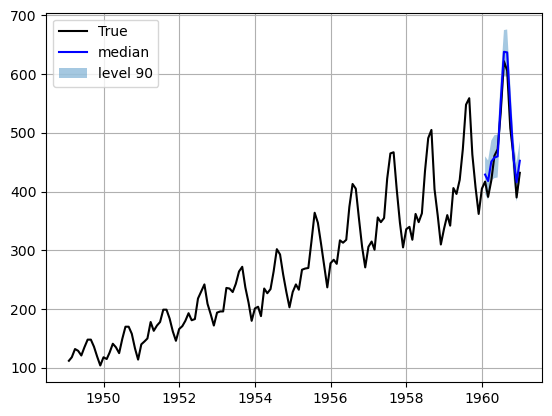

In [36]:
# Plot quantile predictions
Y_hat_df = forecasts.reset_index(drop=False).drop(columns=['unique_id','ds'])
plot_df = pd.concat([Y_test_df, Y_hat_df], axis=1)
plot_df = pd.concat([Y_train_df, plot_df])

#plot_df = plot_df[plot_df.unique_id=='Airline1'].drop('unique_id', axis=1)
plt.plot(plot_df['ds'], plot_df['y'], c='black', label='True')
plt.plot(plot_df['ds'], plot_df['NBEATS-median'], c='blue', label='median')
plt.fill_between(x=plot_df['ds'][-12:], 
                 y1=plot_df['NBEATS-lo-90'][-12:].values, 
                 y2=plot_df['NBEATS-hi-90'][-12:].values,
                 alpha=0.4, label='level 90')
plt.grid()
plt.legend()
plt.plot()

In [13]:
AirPassengersPanel['ds'].values[-12]

numpy.datetime64('1960-01-31T00:00:00.000000000')

In [19]:
Y_train_df.shape


(132, 3)